In [66]:
from PIL import Image
import PIL
import os
import tifffile
import glob
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import multiprocessing
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)
%load_ext autoreload
%autoreload 2
from utils import create_random_patches

PIL.Image.MAX_IMAGE_PIXELS = 933120000



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
cores_ignore_18_810 = open('../data/not_good_quality_crops.txt').read().splitlines()
cores_ignore_18_810 = [core.split('/')[-1].lower() for core in cores_ignore_18_810]

In [45]:
im = Image.open('/data/projects/pixel_project/datasets/NKI_project_TMAs/TMA_18_810/Channels_all/core47.tif')
width, height = im.size
#im = im.resize((width//10, height//10))

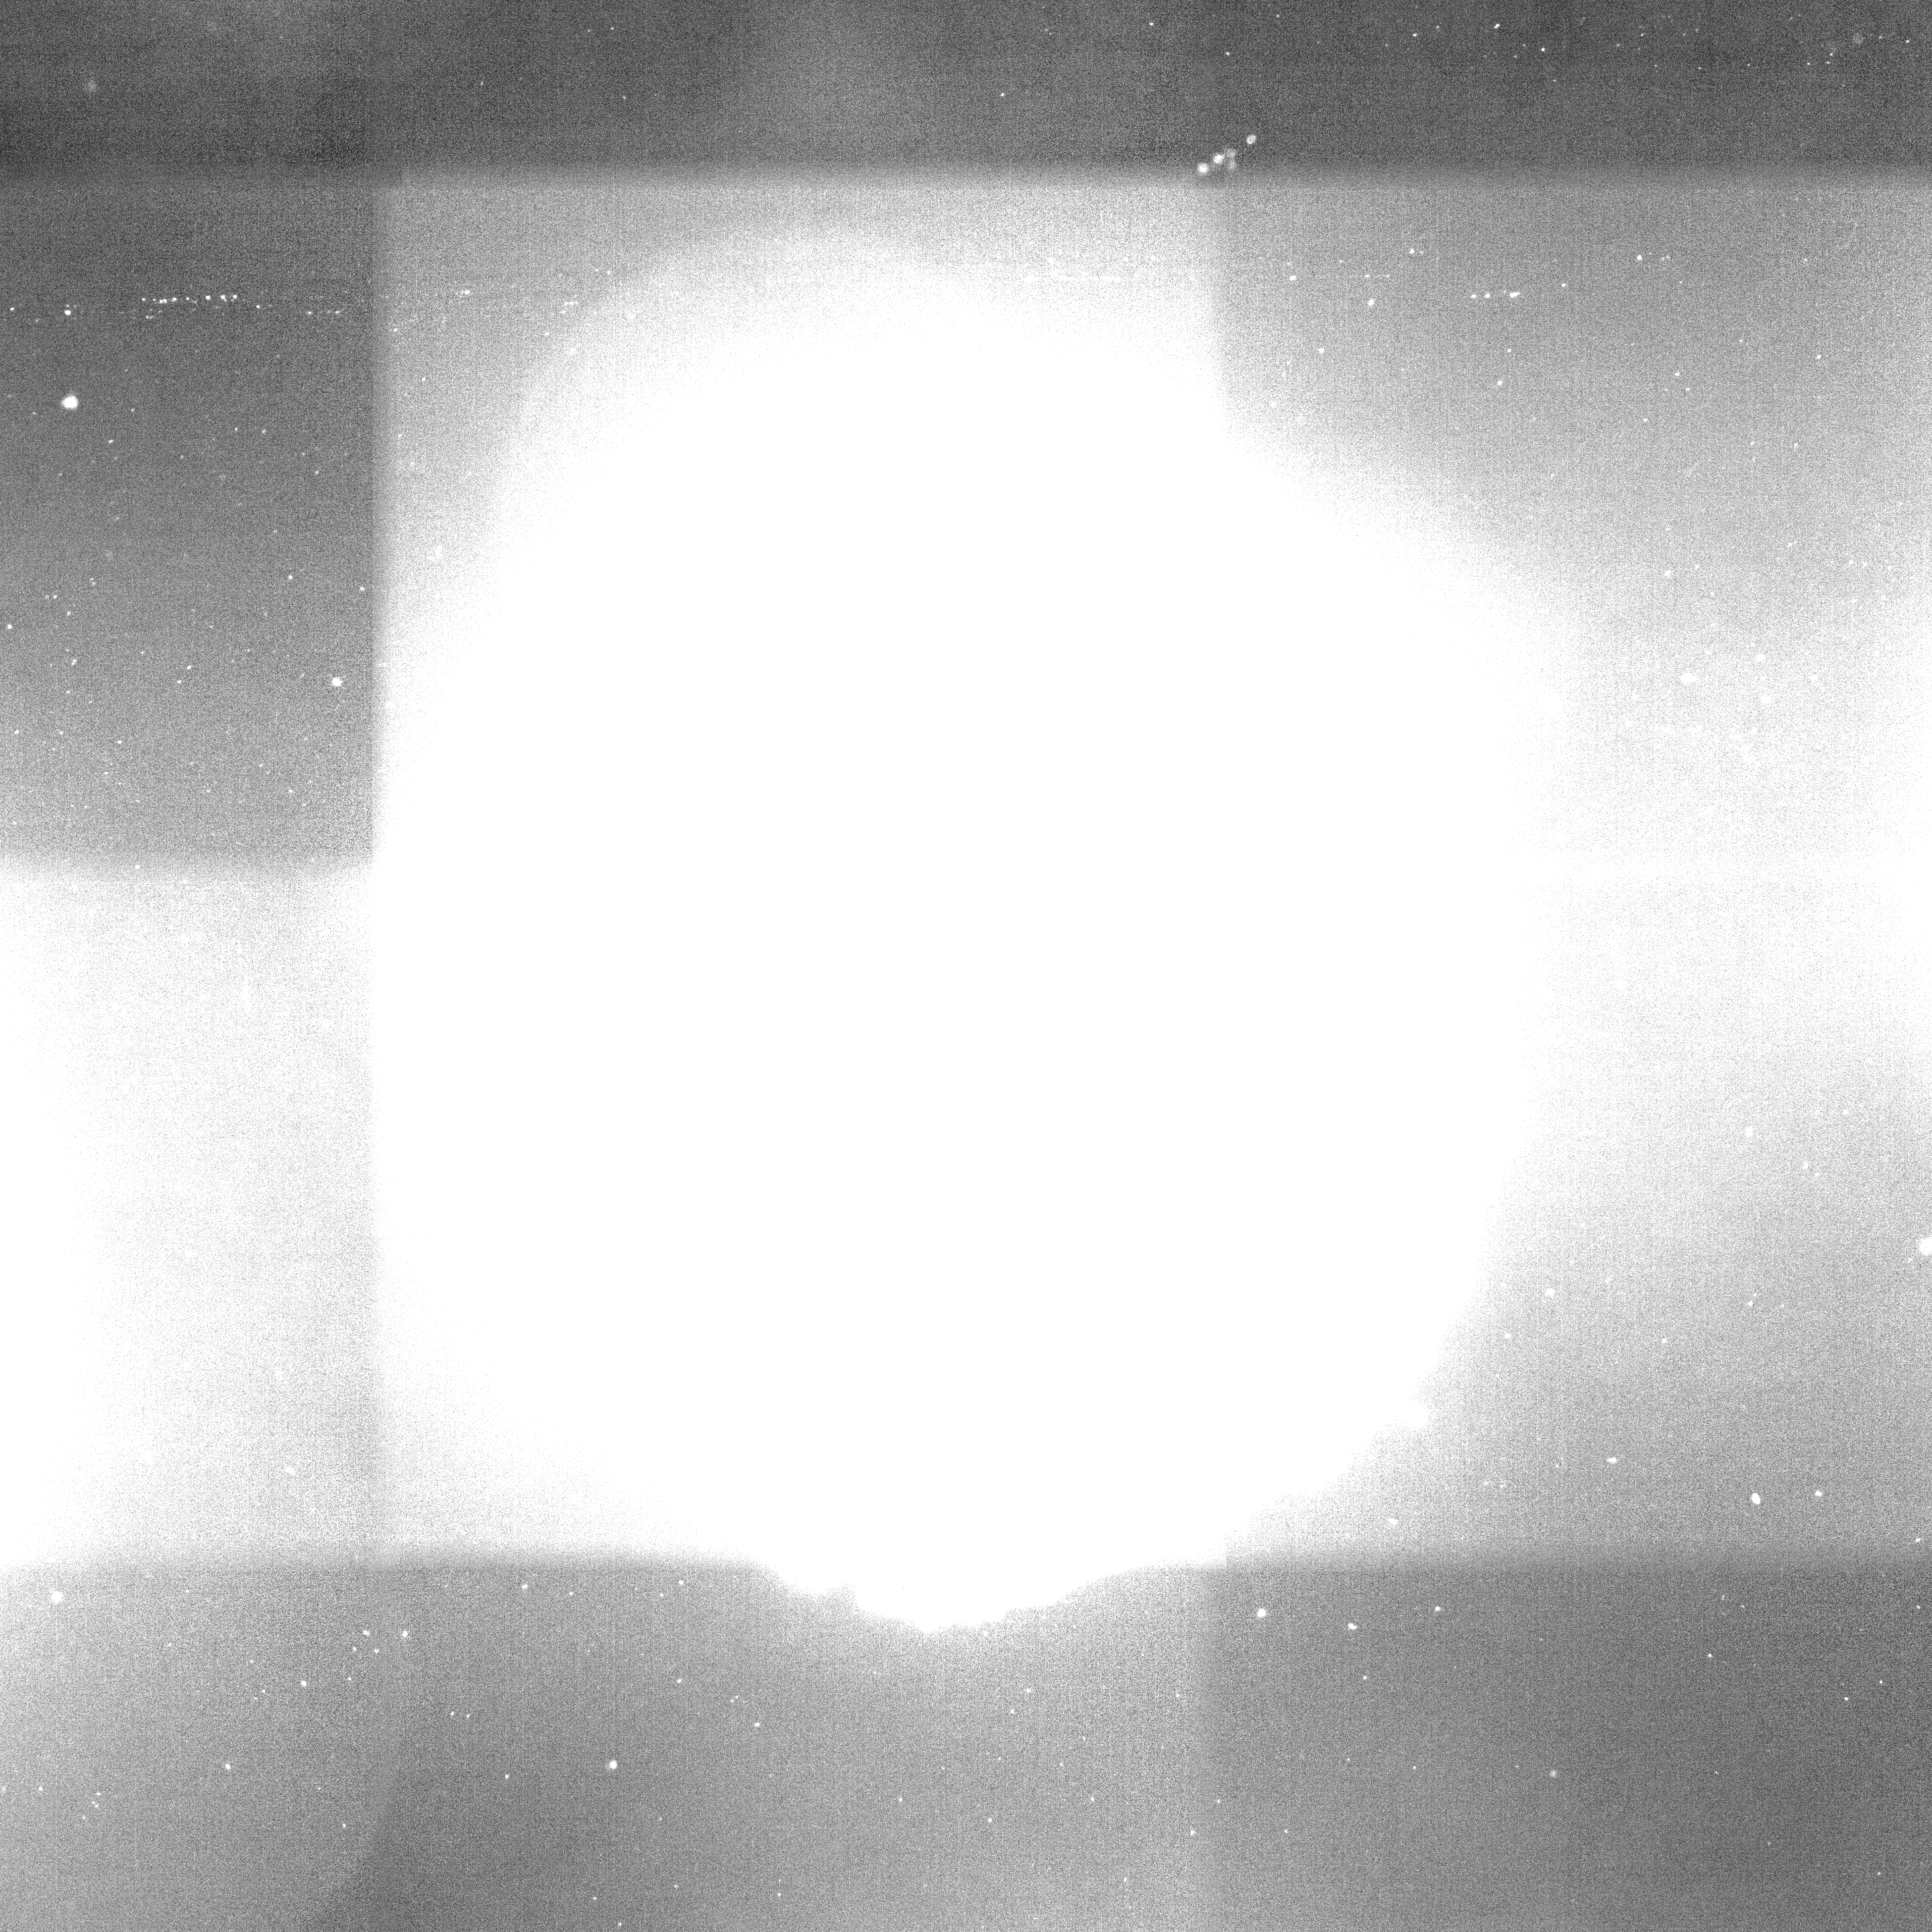

In [46]:
im.show()

In [47]:
im.size

(2880, 2880)

In [23]:
image_np = np.array(Image.open('/data/projects/pixel_project/datasets/NKI_project_TMAs/TMA_18_810.ome.tif').convert('L'))

/home/matiasai/pixel_ai/venv/lib/python3.8/site-packages/PIL/Image.py:3182: DecompressionBombWarning: Image size (1027613358 pixels) exceeds limit of 933120000 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [24]:
image_np.shape

(30969, 33182)

In [27]:
im_tiff = tifffile.imread('/data/projects/pixel_project/datasets/NKI_project_TMAs/TMA_18_810.ome.tif', maxworkers=6)


In [28]:
im_tiff.shape
# try with patches 100x100 or 50 x50 
# remove all channels that starts with dna that are not dna 1 (should get to around 37 channels)
#For_napary_all-chanels.xlsx


(48, 30969, 33182)

In [67]:
patch_size = (32, 32)
output_path = '/data/projects/pixel_project/datasets/NKI_project_TMAs/patches/randomly_generated/TMA_18_810/'


 # List of files to process
files_to_process = [file for file in glob.glob("/data/projects/pixel_project/datasets/NKI_project_TMAs/TMA_18_810/Channels_all/*.tif") if file not in cores_ignore_18_810]
for file_name in files_to_process:
    pathlib.Path(output_path+file_name.split('.')[0]).mkdir(parents=True, exist_ok=True) 

# Number of processes to run in parallel
num_processes = 16

# Create a multiprocessing Pool
pool = multiprocessing.Pool(processes=num_processes)

# Use the Pool.starmap function to distribute the work among processes
pool.starmap(create_random_patches, [(file, patch_size, output_path + pathlib.Path(file).stem) for file in files_to_process])

# Close the Pool to free up resources
pool.close()
pool.join()



In [54]:
im_core_1_patch_0 = tifffile.imread('/data/projects/pixel_project/datasets/NKI_project_TMAs/patches/randomly_generated/TMA_18_810/core44/patch_0_1024.tiff')


In [55]:
im_core_1_patch_0[0,:,:].shape

(512, 512)

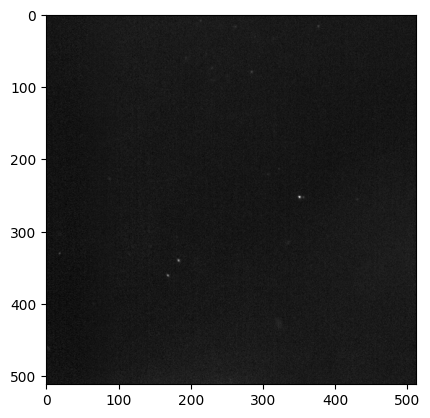

In [56]:
plt.imshow(im_core_1_patch_0[0,:,:], cmap='gray')

In [51]:
im_core_47 = tifffile.imread('/data/projects/pixel_project/datasets/NKI_project_TMAs/TMA_18_810/Channels_all/core47.tif')
im_core_120 = tifffile.imread('/data/projects/pixel_project/datasets/NKI_project_TMAs/TMA_18_810/Channels_all/core120.tif')


In [49]:
im_core_47.shape

(38, 2880, 2880)

In [52]:
im_core_120.shape

(48, 2880, 2880)

In [58]:
cores_shapes = []
for file in files_to_process:
    cores_shapes.append({'core':file.split('/')[-1], 'shape':tifffile.imread(file).shape})

In [59]:
cores_shapes

[{'core': 'core22.tif', 'shape': (38, 2463, 2880)},
 {'core': 'core141.tif', 'shape': (48, 2880, 2880)},
 {'core': 'core146.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core147.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core148.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core73.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core1.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core23.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core100.tif', 'shape': (48, 2880, 2880)},
 {'core': 'core24.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core101.tif', 'shape': (48, 2880, 2880)},
 {'core': 'core29.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core10.tif', 'shape': (48, 2880, 2880)},
 {'core': 'core25.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core102.tif', 'shape': (48, 2880, 2880)},
 {'core': 'core26.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core103.tif', 'shape': (48, 2880, 2880)},
 {'core': 'core27.tif', 'shape': (38, 2880, 2880)},
 {'core': 'core105.tif', 'shape': (48, 2880, 2880)},
 {'c

In [ ]:
channel_selected = [0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 21, 22, 23, 25, 26, 27, 29, 30, 31, 33, 34, 35, 37, 38, 39, 41, 42, 43, 45, 46, 47]
